**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [94]:
from  ExchangeEcon import ExchangeEcon
model = ExchangeEcon()

### 2.1. <a id='toc2_1_'></a>[Illustrating $\mathcal{C}$ in an Edgeworth Box](#toc0_)

We employ the method FindCore() to find the set of all pareto-improving allocations, $\mathcal{C}$.

The set of pareto-improving allocations is the plotted using the method PlotCore().

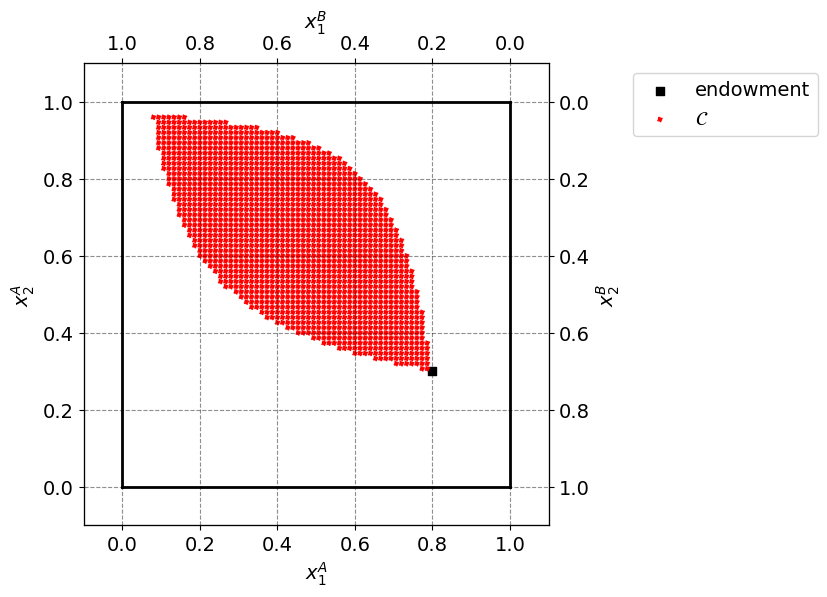

In [95]:
x_core, y_core, core = model.FindCore() ; model.PlotCore(x_core,y_core)

### 2.2. <a id='toc2_1_'></a>[Error in market clearing conditions with discrete set of prices](#toc0_)

We calculate the market error for every price of good 1 in $\mathcal{P}_1$ using the method FindError(). The results are shown in the plot. We also calculate the price that produce the smallest market clearing error.

The smallest market clearing error is (eps1,eps2) = (-0.006,0.005)
The price that has the smallest market clearing error is p1 = 0.953


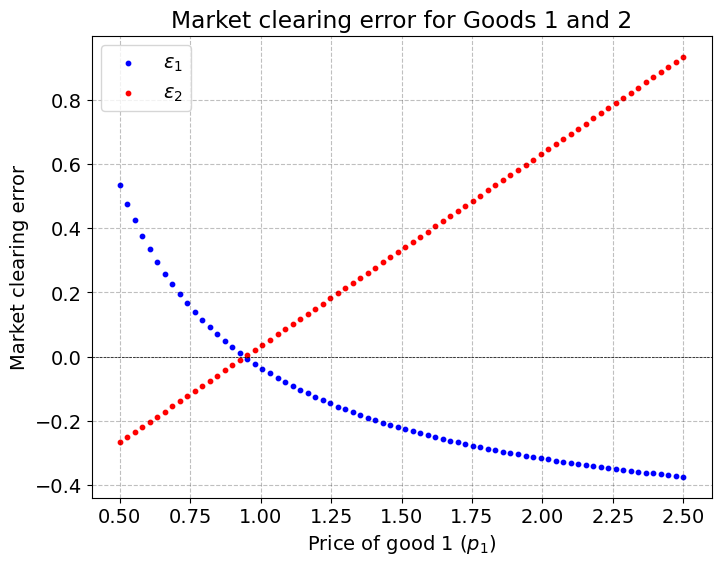

In [96]:
DiscPrices,eps1,eps2 = model.FindError()

### 2.3. <a id='toc2_1_'></a>[Solving for the market clearing price](#toc0_)

To find the market clearing price we employ the method ClearingPrice(), which solves for the price that satisfies the market clearing demands.

In [97]:
ClearPrice = model.ClearingPrice()

The market clearing price for good 1: 0.944
Value of the market clearing error for the market of good 1: -0.000
Value of the market clearing error for the market of good 2: 0.000
The allocation they would end with would be (x1A,x2A) = (0.37,0.70)
Utility of consumer A in equlibrium is 0.569 and for consumer B it is 0.489


### 2.4.a <a id='toc2_1_'></a>[Consumer A sets price of good 1 from a discrete set of values](#toc0_)

To find the price that consumer A would set if he had to stay within the boundaries of $\mathcal{P}_1$ we employ the method SolveADiscrete(). The method maximizes consumer A's utility given the demand of consumer B at given price of good 1  in $\mathcal{P}_1$.

In [6]:
DiscPriceConsA = model.SolveADiscrete()

The price of good 1 that consumer A would choose: 1.887
The allocation they would end with would be (x1A,x2A) = (0.62,0.64)
Utility of consumer A at their chosen price is 0.634 and for consumer B it is 0.373


### 2.4.b <a id='toc2_1_'></a>[Consumer A sets price of good 1 from any positive non-zero value](#toc0_)

To find the price that consumer A would set if the only restriction is $p_1 \geq 0$ we employ the method SolveAContinous(). The method maximizes consumer A's utility using a bounded optimizer from SciPy.

In [7]:
ContPriceConsA = model.SolveAContinous()

The price of good 1 that consumer A would choose: 1.899
The allocation they would end with would be (x1A,x2A) = (0.62,0.64)
Utility of consumer A at their chosen price is 0.634 and for consumer B it is 0.373


### 2.5.a <a id='toc2_1_'></a>[Consumer A maximizes their utility from any $(x_1^A,x_2^A)\in \mathcal{C}$](#toc0_)

To find the allocation that maximizes A's utility under the constraint that $(x_1^A,x_2^A)\in \mathcal{C}$ we employ the method MaxUtilACore(). This method simply loops through all the allocations that are in the set $\mathcal{C}$ and chooses the one that amounts to the largest utility for A.

In [10]:
DiscMaxx1,DiscMaxx2 = model.MaxUtilACore(core)

Consumer A chooses the allocation (x1A,x2A) = (0.56,0.85)
Utility of consumer A at this allocation is 0.742 and for consumer B it is 0.305


### 2.5.b <a id='toc2_1_'></a>[Consumer A maximizes their utility under the condition that the allocation is pareto-improving](#toc0_)

To find the allocation that maximizes A's utility under the condition that the allocation must be paretoimproving we empoyt the method MaxUtilParetoImp(). The method uses a bounded and constrained optimizer to maximize the utility of consumer A.

In [11]:
ParMaxx1,ParMaxx2 = model.MaxUtilParetoImp()

Consumer A chooses the allocation (x1A,x2A) = (0.58,0.84)
Utility of consumer A at this allocation is 0.743 and for consumer B it is 0.304


### 2.6.a <a id='toc2_1_'></a>[Social planner maximizes total utility](#toc0_)

To find the allocation that the social planner would choose we employ the method SocialPlanner(). This method uses a bounded optimizer to maximize the total utility of consumer A and B.

In [12]:
Socx1,Socx2 = model.SocialPlanner()

The social planner chooses the allocation (x1A,x2A) = (0.333,0.667)
Utility of consumer A at this allocation is 0.529 and for consumer B it is 0.529
Total utility becomes 1.058


### 2.6.a <a id='toc2_1_'></a>[Plotting and discussion of results from question (2.3)-(2.6)](#toc0_)

To illustrate the social planners optimum we find the indifference curves for consumer A and B through that omptimal allocation using the method FindIndifferece(). We then plot those indifference curves in the Edgeworth box.

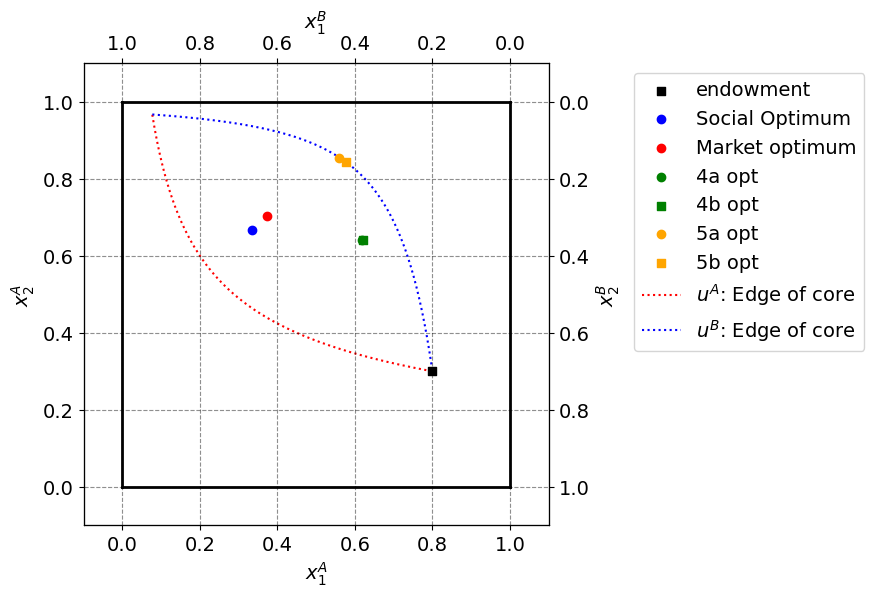

In [13]:
x1vec,x2Avec,x2Bvec = model.FindIndifference(Socx1,Socx2)
model.PlotSocialPlannerEq(x1vec,x2Avec,x2Bvec) #,Socx1,Socx2

For easier comparison we print the results of question 3-6a.

In [14]:
model.print_comparison()

Initial endowment
(x1A,x2A) = (0.800,0.300)
uA = 0.416 : uB = 0.304 : uA + uB = 0.720

Results from question 3
(x1A,x2A) = (0.373,0.704)
uA = 0.569 : uB = 0.489 : uA + uB = 1.058

Results from question 4a
(x1A,x2A) = (0.619,0.641)
uA = 0.634 : uB = 0.373 : uA + uB = 1.007

Results from question 4b
(x1A,x2A) = (0.619,0.641)
uA = 0.634 : uB = 0.373 : uA + uB = 1.007

Results from question 5a
(x1A,x2A) = (0.560,0.853)
uA = 0.742 : uB = 0.305 : uA + uB = 1.047

Results from question 5b
(x1A,x2A) = (0.576,0.844)
uA = 0.743 : uB = 0.304 : uA + uB = 1.047

Results from question 6a
(x1A,x2A) = (0.333,0.667)
uA = 0.529 : uB = 0.529 : uA + uB = 1.058



First of all we see that the allocations reached from trade, where A chooses price or quantities and social optimum produce higher total utility than that of the initial endowment. I.e. all the allocations reached are pareto improving.

Secondly we see that the total utility of the social and competitive optimum are equal. This is to be expected from the first welfare theorem. However in the comp. eq. consumer A has a larger utility as they have the largest initial endowment.

The allocations in 4 and 5 both have a lower total utility as A chooses the allocations / prices. However we see that they all pareto improvements. In 4 we know B wouldn't trade if they were left worse off, i.e. it is obvious that a pareto improvement will happen. In 5 it is a requirement.

Comparing allocation 4 and 5 we see that when A sets prices their utility is lower as A and B engage in trade. This leaves B better off. When A chooses a pareto improving allocation he obvioously chooses on that is on the edge of the core made up by B's indifference curve, such that B has the same utility as initially. 

In conclusion the social optimimum and the competitive equilibrium maximizes the total utility, however in the competitive A is better off. The allocation in 4 and 5 all have lower total utility. In 4 A has some market power as he sets the price which leaves him better off. In 5 A has more market power as he chooses allocations and can therefor freely choose inside the core. Question 3 and 6b are therefore more efficient. The therefore comes down to the normative question of is it fair that A has more than B.

### 2.7 <a id='toc2_1_'></a>[Drawing a random set of endowments](#toc0_)

We draw a 50 x 2 array of random feasible allocations using the method random_allocations().

In [131]:
W = model.random_allocations()

### 2.8 <a id='toc2_1_'></a>[Plotting something](#toc0_)

We plot the market equlibrium allocation for all inital endowments in W using the method market_eq_loop().

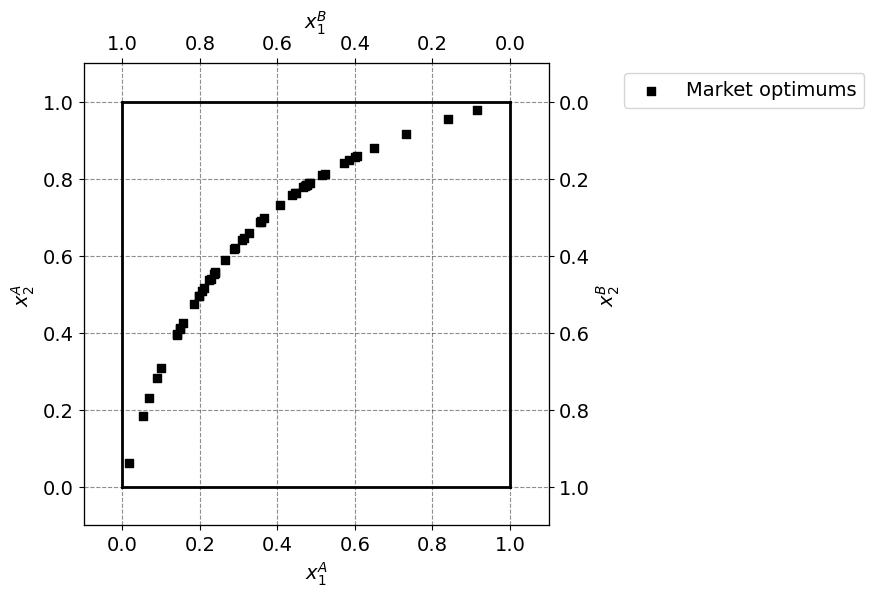

In [130]:
model.market_eq_loop(W)